# Hurricane Track Editor

Quick notebook to edit hurricane tracks to target specific regions

In [1]:
import sys
sys.path.append('/mnt/Work/LaGonaveFM/') # or use path '/home/aesgeorges/LaGonaveFM/scripts/'
from codebase.tools import *

import pandas as pd

import cmocean
import numpy as np
import netCDF4 as netcdf
import matplotlib.pyplot as plt
from tqdm import tqdm
import cartopy.crs as ccrs
import matplotlib as mpl

In [2]:
root = '../staging/runs/Matthew2016_SWAN_mod/v3c2/'
root_mod = '../staging/runs/Matthew2016_v3c2_rehab/'
fort22path_base = root + 'fort.22'
fort22path_mod = root_mod + 'fort.22'

In [3]:
df = pd.read_csv(fort22path_base, header=None)

lat = 0.1 * df[6].str.strip().str.replace('N', '', regex=False).astype(float)
lon = -0.1 * df[7].str.strip().str.replace('W', '', regex=False).astype(float)

times = df[2]

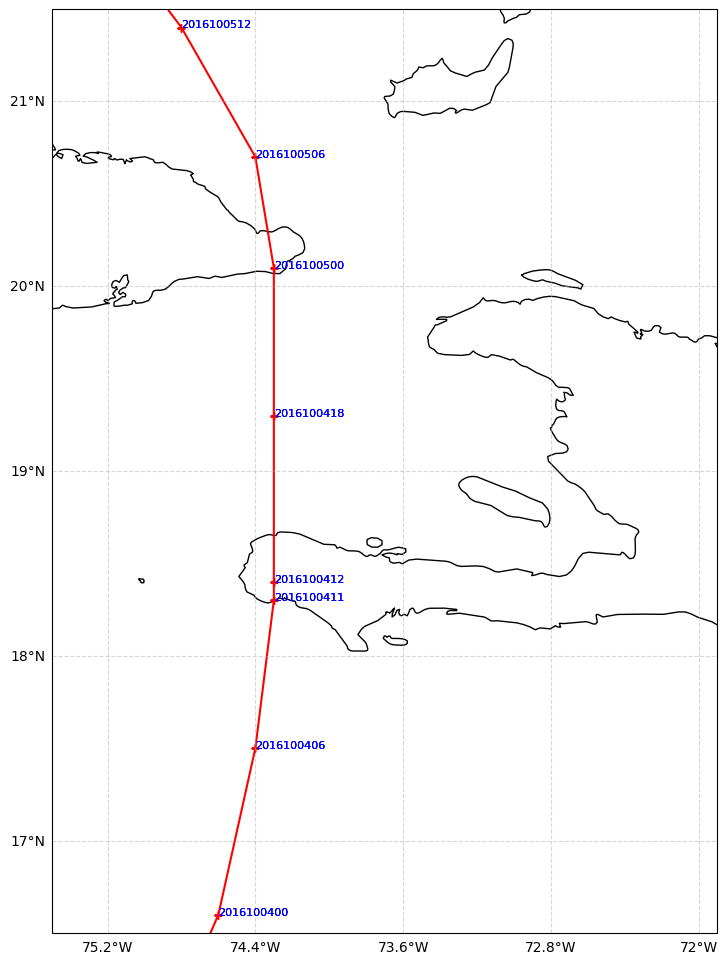

In [4]:
fig, ax = plt.subplots(figsize=(14,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(lon, lat, transform=ccrs.PlateCarree(), color='red', marker='+')
ax.coastlines()

for x, y, t in zip(lon, lat, times):
    ax.text(x, y, str(t), transform=ccrs.PlateCarree(), fontsize=8, color='blue', clip_on=True)

ax.set_extent([-75.5, -71.9, 16.5, 21.5])

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mpl.ticker.MaxNLocator(nbins=5)
gl.ylocator = mpl.ticker.MaxNLocator(nbins=5)

In [12]:
df_mod = pd.read_csv(fort22path_mod, header=None)

lat_mod = 0.1 * df_mod[6].str.strip().str.replace('N', '', regex=False).astype(float)
lon_mod = -0.1 * df_mod[7].str.strip().str.replace('W', '', regex=False).astype(float)

times_mod = df_mod[2]

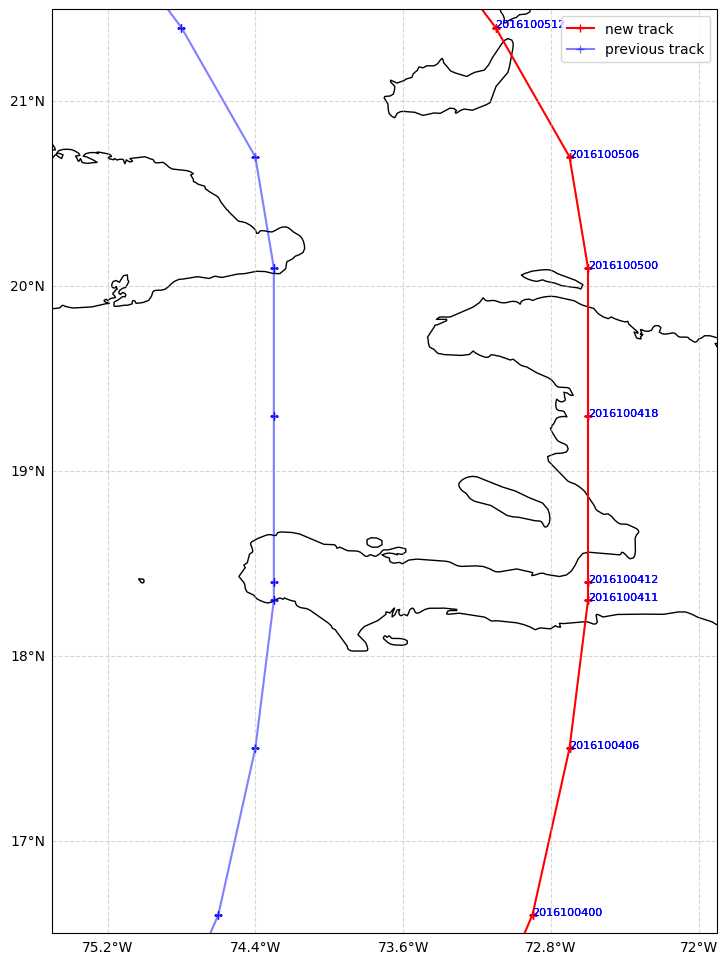

In [13]:
fig, ax = plt.subplots(figsize=(14,12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(lon_mod, lat_mod, transform=ccrs.PlateCarree(), color='red', marker='+', label='new track')
ax.plot(lon, lat, transform=ccrs.PlateCarree(), alpha=0.5, color='blue', marker='+', label='previous track')
ax.legend()
ax.coastlines()

for x, y, t in zip(lon_mod, lat_mod, times_mod):
    ax.text(x, y, str(t), transform=ccrs.PlateCarree(), fontsize=8, color='blue', clip_on=True)

ax.set_extent([-75.5, -71.9, 16.5, 21.5])


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = mpl.ticker.MaxNLocator(nbins=5)
gl.ylocator = mpl.ticker.MaxNLocator(nbins=5)

In [ ]:
def shift_hurricane_track(input_file, output_file):
    # Read the input file
    with open(input_file, 'r') as f:
        lines = f.readlines()
    
    # Process each line
    modified_lines = []
    for line in lines:
        # Use regular expression to find all instances of numbers followed by W
        import re
        modified_line = line
        # Find all occurrences of digits followed by W
        matches = re.findall(r'(\d+)W', line)
        for match in matches:
            # Convert to integer
            old_value = int(match)
            # Subtract 10 (1 degree eastward)
            new_value = old_value + 1
            # Replace in the line
            modified_line = modified_line.replace(f"{old_value}W", f"{new_value}W")
        
        modified_lines.append(modified_line)
    
    # Write the modified content to the output file
    with open(output_file, 'w') as f:
        f.writelines(modified_lines)
    
    print(f"Track shifted 1.1 degree eastward and saved to {output_file}")
    
    # Print a sample of the modifications for verification
    print("\nSample of modifications:")
    for i in range(min(5, len(lines))):
        old_match = re.search(r'(\d+)W', lines[i])
        new_match = re.search(r'(\d+)W', modified_lines[i])
        if old_match and new_match:
            print(f"Line {i+1}: {old_match.group(0)} -> {new_match.group(0)}")

# Example usage
input_file = "../staging/runs/Matthew2016_SWAN_mod/adcirc+swan_new/fort.22"
output_file = "../staging/runs/Matthew2016_SWAN_mod/adcirc+swan_new/fort.22.shifted"
shift_hurricane_track(input_file, output_file)

Track shifted 1.1 degree eastward and saved to ../staging/runs/Matthew2016_SWAN_mod/adcirc+swan_new/fort.22.shifted

Sample of modifications:
Line 1: 733W -> 735W
Line 2: 733W -> 735W
Line 3: 733W -> 735W
Line 4: 733W -> 735W
Line 5: 733W -> 735W
